In [6]:
import numpy as np
from matplotlib import pyplot as plt
def get_data(data):
    n = []
    e = []
    err = []
    for line in data.splitlines():
        if len(line) > 0 and not line.startswith('#'):
            m = [int(line.split()[0])]
            n = np.hstack((n,m))
            energy = [float(line.split()[-3])]
            e = np.hstack((e,energy))
            error = [float(line.split()[-1])]
            err = np.hstack((err,error))
    e_per = e/n
    err_per = err/n
    return n,e_per,err_per

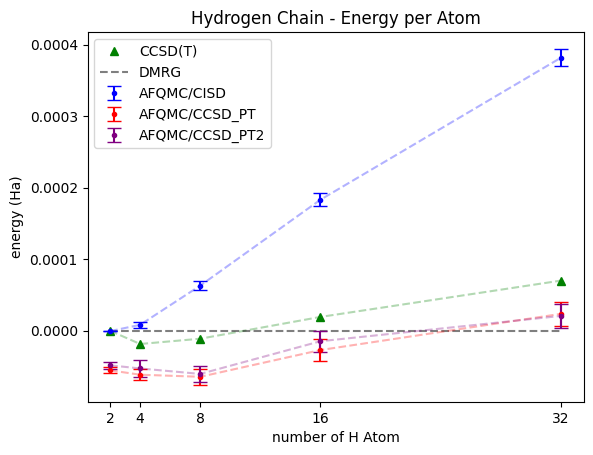

In [7]:
# H-chain
ccsd_t = '''
2   -1.09607128 +/- 0.0000000
4   -2.16536821 +/- 0.0000000
8   -4.313904971972976 +/- 0.0000000
16  -8.61854700778071 +/- 0.0000000
32  -17.23124549431447 +/- 0.0000000
# 64  -34.45730816042984 +/- 0.0000000
'''
dmrg = '''
2   -1.09607128 +/- 0.0000000
4   -2.165294115133054 +/-    0.0000000000
8   -4.313815985592090 +/-    0.0000000000
16  -8.618856599941854 +/-    0.0000000000
32  -17.233489849401160 +/-    0.0000000000
# 64  -34.4649877142 +/-    0.0000000000
'''
afqmc_cisd = '''
2 -1.09607227 +/- 0.0000000
4 -2.165261 +/- 0.000017
8 -4.313311 +/- 0.000051
16 -8.615924 +/- 0.000147
32 -17.221271 +/- 0.000393
'''
afqmc_ccsd_pt = '''
2 -1.096182 +/- 0.000008
4 -2.165540 +/- 0.000031
8 -4.314331 +/- 0.000091
16 -8.619288 +/- 0.000241
32 -17.232733 +/- 0.000550
'''
afqmc_ccsd_pt2 = '''
2  -1.096168 +/- 0.000010
4  -2.165505 +/- 0.000049
8  -4.314299 +/- 0.000091
16 -8.619091 +/- 0.000231
32 -17.232826 +/- 0.000540
'''
n1,e_per1,err_per1 = get_data(ccsd_t)
n2,e_per2,err_per2 = get_data(dmrg)
n3,e_per3,err_per3 = get_data(afqmc_cisd)
n4,e_per4,err_per4 = get_data(afqmc_ccsd_pt)
n5,e_per5,err_per5 = get_data(afqmc_ccsd_pt2)
plt.plot(n1,e_per1-e_per2,'^',color='green',label='CCSD(T)')
plt.plot(n1,e_per1-e_per2, '--', color='green', alpha=0.3)
# plt.plot(n2,e_per2-e_per2,'.',color='black',label='DMRG')
plt.plot(n2,e_per2-e_per2, '--', color='black',alpha=0.5,label='DMRG')
plt.errorbar(n3,e_per3-e_per2,yerr=err_per3,fmt='.',color='blue',capsize=5,label='AFQMC/CISD')
plt.plot(n3,e_per3-e_per2, '--', color='blue', alpha=0.3)
plt.errorbar(n4,e_per4-e_per2,yerr=err_per4,fmt='.',color='red',capsize=5,label='AFQMC/CCSD_PT')
plt.plot(n4,e_per4-e_per2, '--', color='red', alpha=0.3)
plt.errorbar(n5,e_per5-e_per2,yerr=err_per5,fmt='.',color='purple',capsize=5,label='AFQMC/CCSD_PT2')
plt.plot(n5,e_per5-e_per2, '--', color='purple', alpha=0.3)
plt.xticks(n1)
plt.xlabel('number of H Atom')
plt.ylabel('energy (Ha)')
plt.title('Hydrogen Chain - Energy per Atom')
plt.legend()
plt.show()